# Decision Tree Model

This code is an adaptation of the Decision Tree model provided by Professor Jorge Henriques in the course slides.

### Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Import and clean data

In [16]:
data = pd.read_csv("COVID_numerics.csv")
print(data)

D = data.values
X = D[:,0:8]
T = D[:,8]

# Handle missing values in features (X) manually
for i in range(X.shape[1]):
    idM = np.where(X[:, i] < 0) # Missing data
    idV = np.where(X[:, i] >= 0) # Valid data
    
    if len(idM[0])>0:
        featureMean = np.mean(X[idV, i]).round()
        X[idM, i] = featureMean

     GENDER   AGE  MARITAL STATUS  VACINATION  RESPIRATION CLASS  HEAR RATE  \
0       0.0  71.0             1.0         1.0                1.0  83.456271   
1       0.0  82.0             1.0         0.0                3.0  79.449753   
2       1.0  65.0             0.0         0.0                3.0  85.470779   
3       1.0  64.0             0.0         0.0                1.0  51.561135   
4       0.0  85.0             1.0         0.0                2.0  89.008377   
..      ...   ...             ...         ...                ...        ...   
595     1.0  60.0             1.0         0.0                1.0  72.236092   
596     0.0  56.0             1.0         0.0                1.0  74.460422   
597     0.0  55.0             0.0         1.0                3.0  43.010392   
598     1.0  60.0             0.0         0.0                2.0  61.320137   
599     0.0  54.0             1.0         0.0                3.0  75.681904   

     SYSTOLIC BLOOD PRESSURE  TEMPERATURE  TARGET  

### Model

In [17]:
model = tree.DecisionTreeClassifier(criterion="gini",
                                    max_depth=3,
                                    min_samples_split=8,
                                    min_samples_leaf=8, 
                                    max_features=None,
                                    random_state=42,
                                    max_leaf_nodes=10)

### Train-Test Split

In [18]:
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.30, random_state=42)

### Train the Model & Evaluate Performance

In [19]:
model = model.fit(Xtrain,Ttrain)
Ytrain = model.predict(Xtrain)

print("#### Train Performance ####")
accuracy = metrics.accuracy_score(Ttrain, Ytrain)
print(f"\nModel Accuracy: {accuracy}\n")
cm = metrics.confusion_matrix(Ttrain,Ytrain)
print(cm)
TN, FP, FN, TP = cm.ravel()
SE = TP/(TP+FN) #sensitivity
SP = TN/(TN+FP) #specificity
P = TP / (TP + FP) #precision
print(f"TN={TN}\nTP={TP}\nFN={FN}\nFP={FP}")
print(f"\nSensitivity = {SE.round(6)}\nSpecificity = {SP.round(6)}\nPrecision = {P.round(6)}")

#### Train Performance ####

Model Accuracy: 0.7928571428571428

[[238  44]
 [ 43  95]]
TN=238
TP=95
FN=43
FP=44

Sensitivity = 0.688406
Specificity = 0.843972
Precision = 0.683453


### Test the Model & Evaluate Performance

In [20]:
Ytest = model.predict(Xtest)

print("#### Test Performance ####")
accuracy = metrics.accuracy_score(Ttest, Ytest)
print(f"\nModel Accuracy: {accuracy}\n")
cm = metrics.confusion_matrix(Ttest,Ytest)
print(cm)
TN, FP, FN, TP = cm.ravel()
SE = TP/(TP+FN) #sensitivity
SP = TN/(TN+FP) #specificity
P = TP / (TP + FP) #precision
print(f"TN={TN}\nTP={TP}\nFN={FN}\nFP={FP}")
print(f"\nSensitivity = {SE.round(6)}\nSpecificity = {SP.round(6)}\nPrecision = {P.round(6)}")

#### Test Performance ####

Model Accuracy: 0.8222222222222222

[[113  12]
 [ 20  35]]
TN=113
TP=35
FN=20
FP=12

Sensitivity = 0.636364
Specificity = 0.904
Precision = 0.744681


### Plot the Decision Tree

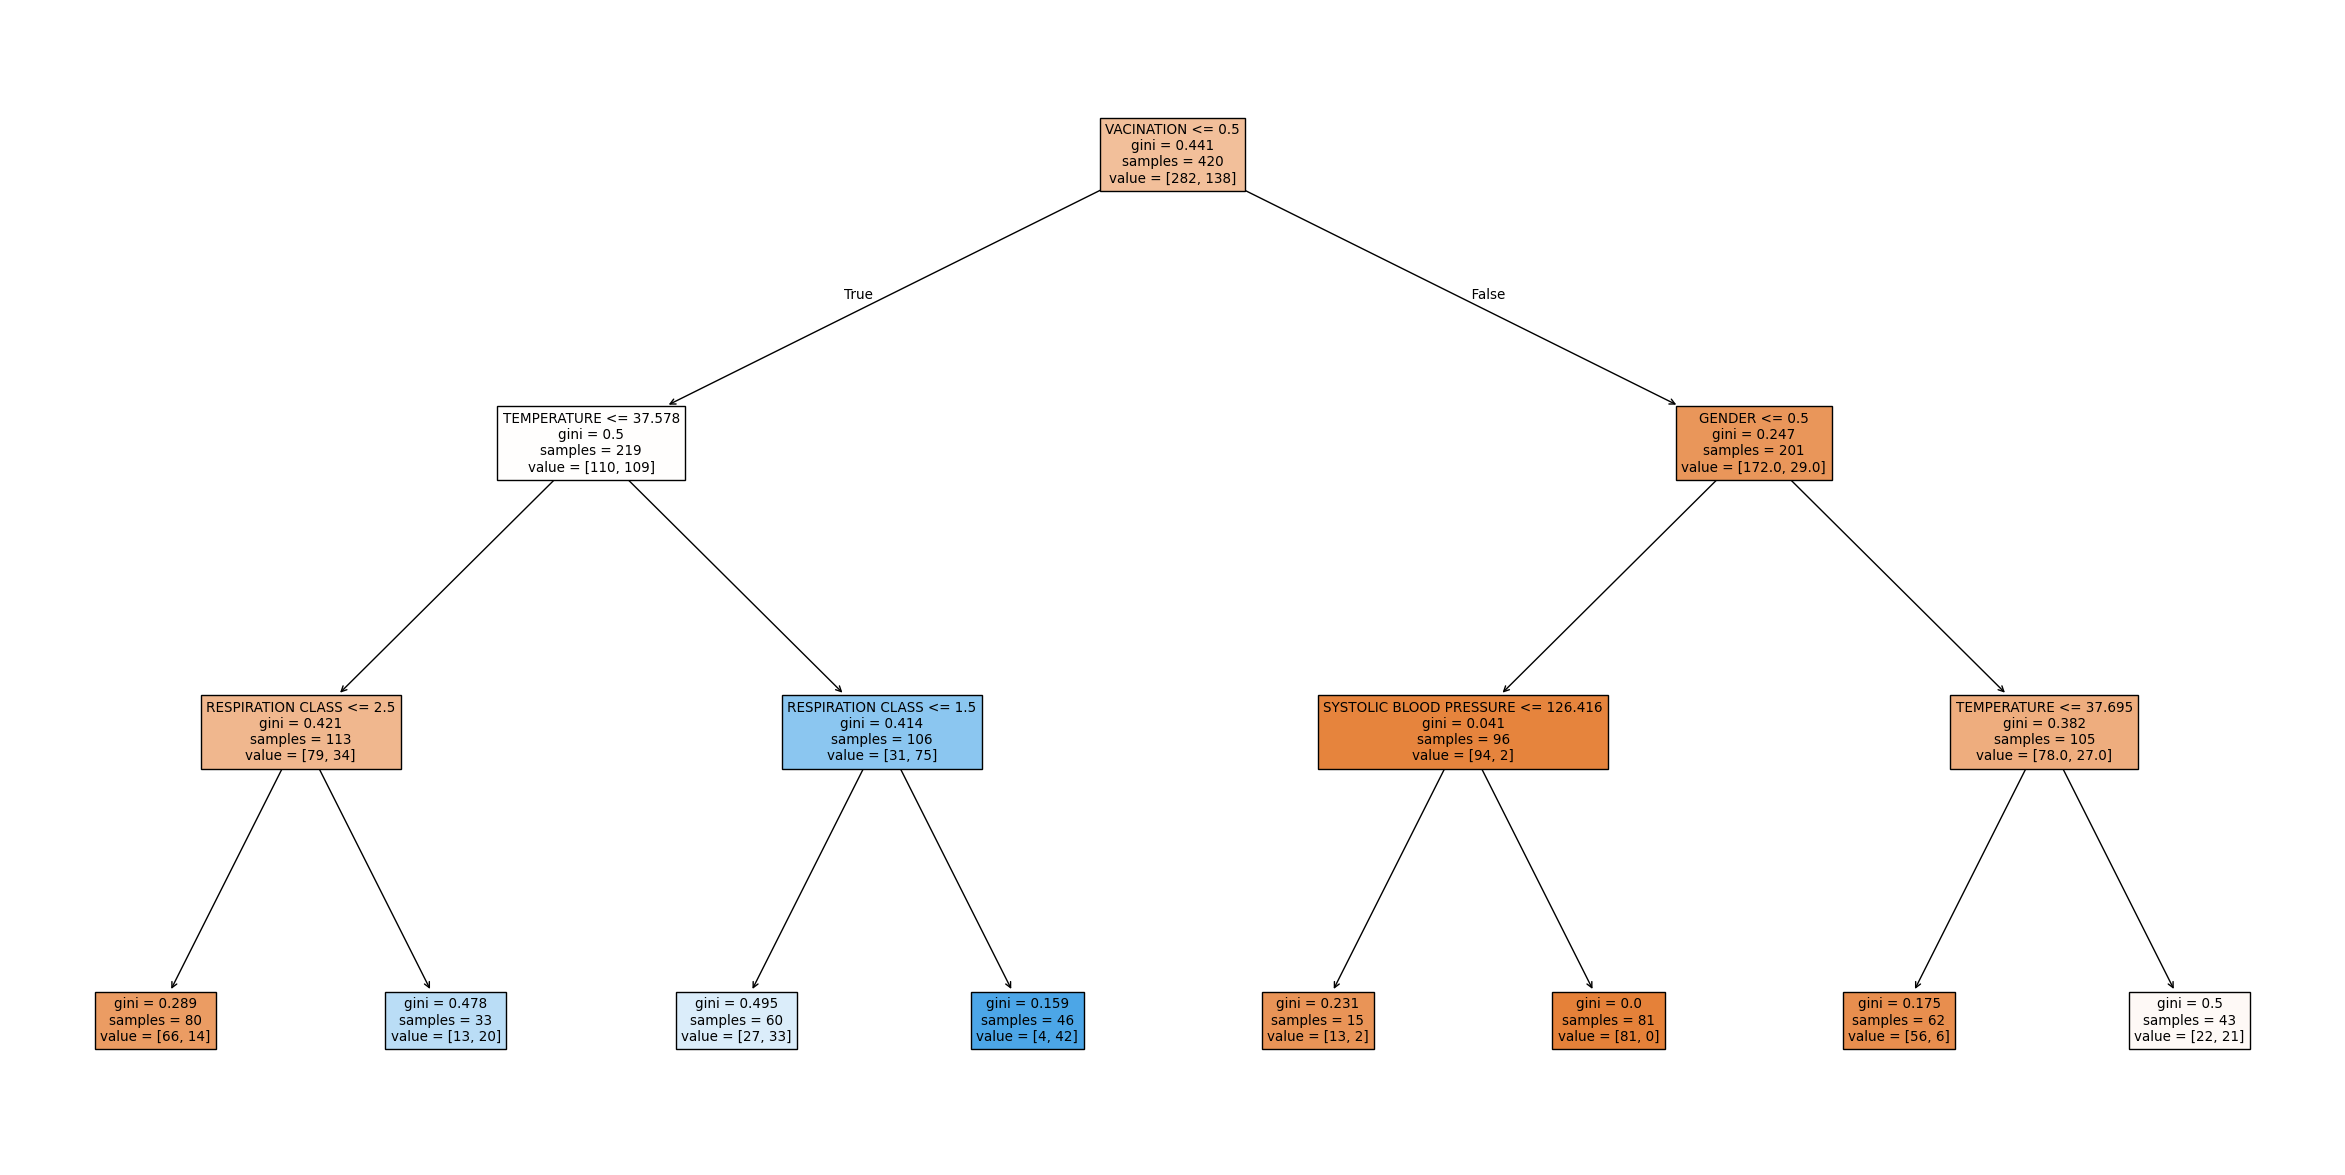

In [21]:
plt.figure(figsize=(30,15))
feature_names = data.columns[0:8]
tree.plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

### Evaluate the importance of each feature

In [22]:
features_importances = list(zip(feature_names, model.feature_importances_))
for feature, importance in features_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: GENDER, Importance: 0.07603847173084566
Feature: AGE, Importance: 0.0
Feature: MARITAL STATUS, Importance: 0.0
Feature: VACINATION, Importance: 0.3554876573192202
Feature: RESPIRATION CLASS, Importance: 0.21105235591554022
Feature: HEAR RATE, Importance: 0.0
Feature: SYSTOLIC BLOOD PRESSURE, Importance: 0.006109265127801757
Feature: TEMPERATURE, Importance: 0.35131224990659216
